# **Comparing Images**

1. Compare Images using Mean Squared Error (MSE)
2. UCompare Images using Structual Similarity

In [11]:
# Our Setup, Import Libaries, Create our Imshow Function and Download our Images
import cv2
import numpy as np
from matplotlib import pyplot as plt
from skimage.metrics import structural_similarity as ssim

# Define our imshow function
def imshow(title = "Image", image = None, size = 8):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

In [2]:
# get image from github
import requests

# URL of the image in your GitHub repository
image_url = "https://raw.githubusercontent.com/rohitsh02/classical_cv_projects/main/image_analysis_and_transformation/f1.png"

# Send a GET request to the image URL
response = requests.get(image_url)

# Save the image to a file in your Colab environment
with open('f1.png', 'wb') as f:
    f.write(response.content)

In [3]:
# URL of the image in your GitHub repository
image_url = "https://raw.githubusercontent.com/rohitsh02/classical_cv_projects/main/image_analysis_and_transformation/f2.png"

# Send a GET request to the image URL
response = requests.get(image_url)

# Save the image to a file in your Colab environment
with open('f2.png', 'wb') as f:
    f.write(response.content)

#### **Mean Squared Error (MSE)**

The MSE between the two images is the `sum of the squared difference between the two images`. This can easily be implemented with numpy.

The lower the MSE the more similar the images are.

In [4]:
def mse(image1, image2):
	# Images must be of the same dimension
	error = np.sum((image1.astype("float") - image2.astype("float")) ** 2)
	error /= float(image1.shape[0] * image1.shape[1])

	return error

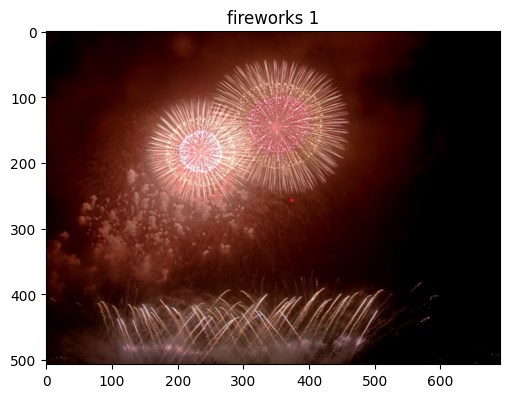

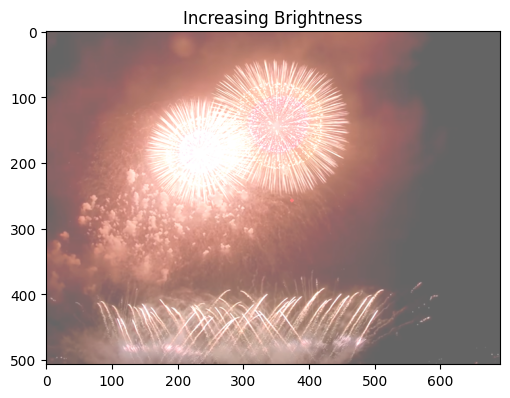

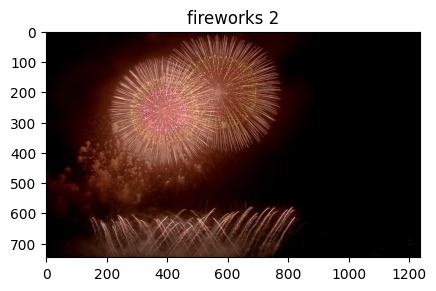

In [5]:
fireworks1 = cv2.imread('f1.png')
fireworks2 = cv2.imread('f2.png')

M = np.ones(fireworks1.shape, dtype = "uint8") * 100
fireworks1b = cv2.add(fireworks1, M)

imshow("fireworks 1", fireworks1)
imshow("Increasing Brightness", fireworks1b)
imshow("fireworks 2", fireworks2)

In [6]:
def compare(image1, image2):
  image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
  image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
  print('MSE = {:.2f}'.format(mse(image1, image2)))
  print('SS = {:.2f}'.format(structural_similarity(image1, image2)))

In [7]:
# When they're the same
compare(fireworks1, fireworks1)

MSE = 0.00
SS = 1.00


In [15]:
# Import necessary modules
import cv2
import numpy as np

# Define the function to compare images
def compare(image1, image2):
    # Resize the images to the same dimensions
    image1 = cv2.resize(image1, (image2.shape[1], image2.shape[0]))
    image2 = cv2.resize(image2, (image1.shape[1], image1.shape[0]))

    # Convert the images to grayscale
    image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
    image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

    # Calculate the mean squared error (MSE)
    print('MSE = {:.2f}'.format(mse(image1, image2)))

    # Calculate the structural similarity (SS)
    print('SS = {:.2f}'.format(structural_similarity(image1, image2)))

# Define the function to calculate the MSE
def mse(image1, image2):
    # Images must be of the same dimension
    error = np.sum((image1.astype("float") - image2.astype("float")) ** 2)
    error /= float(image1.shape[0] * image1.shape[1])
    return error

# Define the function to calculate the SS
def structural_similarity(image1, image2):
    # Images must be of the same dimension
    (score, diff) = ssim(image1, image2, full=True)
    diff = (diff * 255).astype("uint8")
    return score


# Compare the images
compare(fireworks1, fireworks2)

MSE = 1161.45
SS = 0.44


In [16]:
# Compare the images
compare(fireworks1, fireworks1b)

MSE = 9583.24
SS = 0.39
